In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

**Things to Note:**
1. When coding the `class myCallback`, Python 3 will run into an error
```python
TypeError: '>' not supported between instances of 'NoneType' and 'float'
```
when using the code
```python
if(logs.get('accuracy')>0.99):
```

For Python 3, use the following equivalent code line

```python
if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99:
```

2. You can run the notebook using TensorFlow 2.5.0

In [2]:
#!pip install tensorflow==2.5.0

In [3]:
import tensorflow as tf

print(tf.__version__)

2.5.0


In [4]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt

In [5]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

[5 0 4 1 9 2 1 3 1 4]
[7 2 1 0 4 1 4 9 5 9]


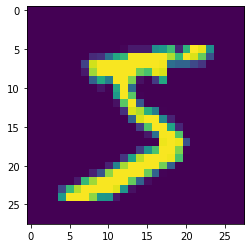

In [7]:
plt.imshow(x_train[0])
print(y_train[0:10])
print(y_test[0:10])

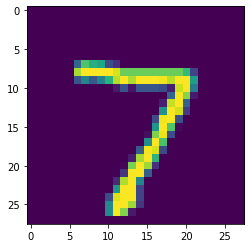

In [8]:
plt.imshow(x_test[0])

In [9]:
# GRADED FUNCTION: train_mnist
def train_mnist():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    # Define callbacks
    class myCallbacks(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            #if(logs.get('accuracy') >=0.99):
            if logs.get('acc') is not None and logs.get('acc') > 0.99:
                print("\nReached 99% accuracy so cancelling training!")
                self.model.stop_training = True

    # YOUR CODE SHOULD END HERE

    mnist = tf.keras.datasets.mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data()
    
    # Instanciate callbacks
    callbacks = myCallbacks()
    
    # Normalize data from 0-255 to 0-1
    training_images=x_train/255.0
    test_images=x_test/255.0
    
    
    # YOUR CODE SHOULD END HERE
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc'])
    
    # model fitting
    history = model.fit(training_images,
                        y_train,
                        epochs=30,
                        callbacks=[callbacks]
    )
    # model fitting
    
    return history.epoch, history.history['acc'][-1]

In [10]:
train_mnist()

2021-10-18 10:15:42.797168: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-18 10:15:45.573676: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2607 - acc: 0.9247
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1129 - acc: 0.9660
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0771 - acc: 0.9766
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0588 - acc: 0.9817A: 0s - loss: 0.0586 -  - ETA: 0s - loss: 0.0586 - acc: 0.
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0455 - acc: 0.9862
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0365 - acc: 0.9883
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0290 - acc: 0.9908

Reached 99% accuracy so cancelling training!


([0, 1, 2, 3, 4, 5, 6], 0.9908333420753479)